<a href="https://colab.research.google.com/github/LuisOtilioZuniga/Programaci-n-para-anal-tica-descriptiva-y-predictiva/blob/main/Pr%C3%A1ctica_21%2C263349.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NOMBRE:** LUIS OTILIO ZÍÑIGA PRÓSPERO **MATRICULA:** 263349

# **Ejercicios con EDA 2 (EXPLORATORY DATA ANALYSIS)**



**Descripción del conjunto de datos:**


Utiliza el conjunto de datos "Haberman's Survival" disponible en el siguiente 'https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"'. Este conjunto contiene datos de pacientes con cáncer de mama, incluyendo edad, año de operación, número de ganglios axilares y estado de supervivencia (categórico). El conjunto de datos tiene valores faltantes.

**1. Descargar el archivo haberman.data desde el enlace proporcionado.**

In [18]:
# Librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# Cargar los datos
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
column_names = ['age', 'year', 'nodes', 'status']
data = pd.read_csv(url, header=None, names=column_names)

**2. Realizar un EDA completo, incluyendo:**

Descripción de los datos.

Utilizando la funcion data.describe se presentan estadisticos básicos para comprender de manera general como se comportan los datos para cada variable. La funcion data.describe nos muestra la media, desviacion estandar, minimo, Los cuartiles (25%, 50% y 75%) y el maximo.

In [19]:
# Descripción de los datos
descripcion = data.describe()
print(descripcion)

              age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


Histogramas para las columnas numéricas.

Un histograma nos permite visualizar si existe una tendencia de concentracion en alguna zona en especifico para alguna variable. Existen varias distribuciones (Normal, binomial, bimodales, etc) Comprender el comportamiento de los datos es clave para el analisis.

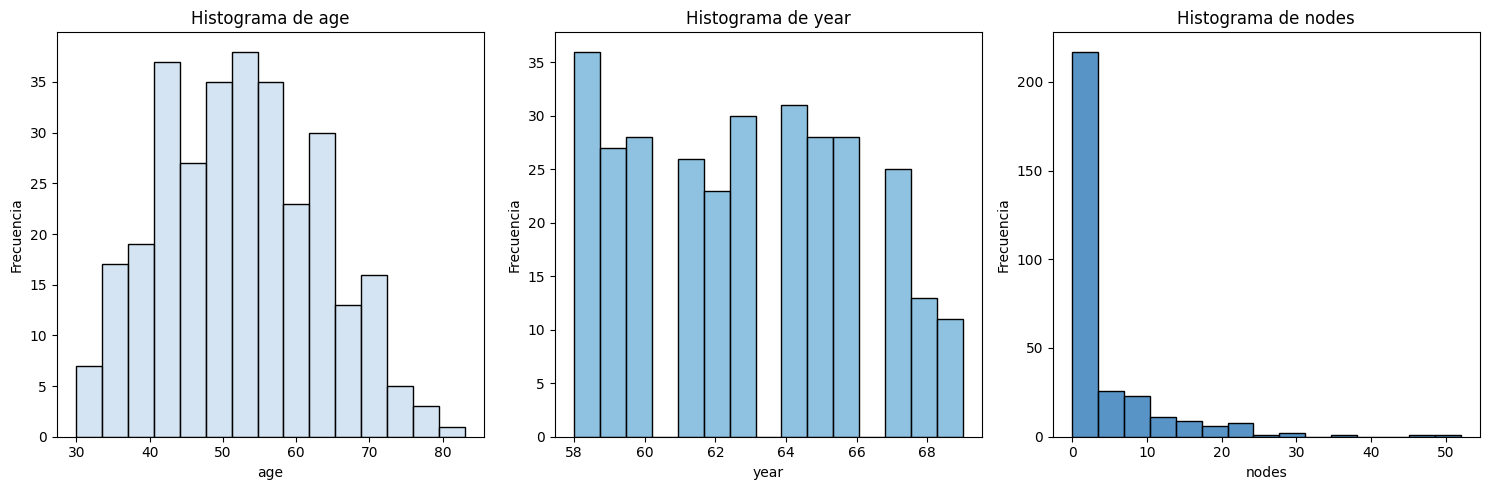

In [20]:
# Seleccionar columnas numéricas
columnas_numericas = data.select_dtypes(include=np.number).columns[:-1]  # Excluimos 'status'

# Configuración de la paleta de colores azul
paleta_azul = sns.color_palette("Blues", n_colors=len(columnas_numericas))

# Crear histogramas
plt.figure(figsize=(15, 5))
for i, col in enumerate(columnas_numericas):
    plt.subplot(1, len(columnas_numericas), i+1)
    sns.histplot(data[col], bins=15, color=paleta_azul[i], kde=False)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

Gráficas de barras para la columna categórica status (supervivencia).

/tmp/ipython-input-936733458.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_status.index, y=conteo_status.values, palette=colores_status)


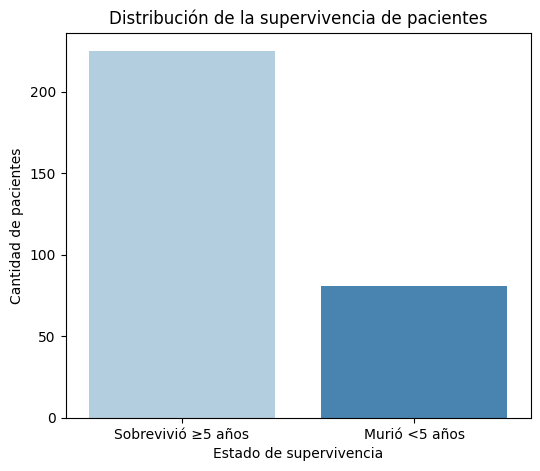

In [21]:
# Contar la cantidad de cada categoría
conteo_status = data['status'].value_counts().sort_index()

# Configuración de la paleta de colores azul
colores_status = sns.color_palette("Blues", n_colors=len(conteo_status))

# Gráfico de barras
plt.figure(figsize=(6, 5))
sns.barplot(x=conteo_status.index, y=conteo_status.values, palette=colores_status)
plt.xticks([0, 1], ['Sobrevivió ≥5 años', 'Murió <5 años'])
plt.xlabel('Estado de supervivencia')
plt.ylabel('Cantidad de pacientes')
plt.title('Distribución de la supervivencia de pacientes')
plt.show()

Boxplots para identificar outliers en las columnas numéricas.

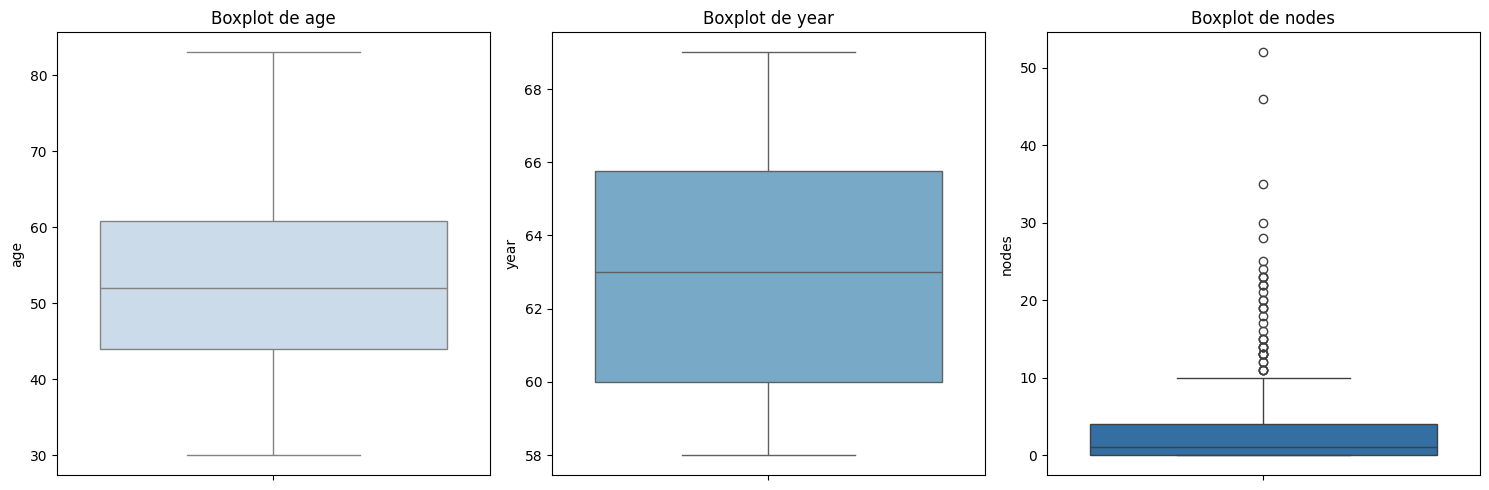

In [22]:
# Seleccionar columnas numéricas
columnas_numericas = data.select_dtypes(include=np.number).columns[:-1]  # Excluimos 'status'

# Configuración de la paleta de colores azul
paleta_azul = sns.color_palette("Blues", n_colors=len(columnas_numericas))

# Crear boxplots
plt.figure(figsize=(15, 5))
for i, col in enumerate(columnas_numericas):
    plt.subplot(1, len(columnas_numericas), i+1)
    sns.boxplot(y=data[col], color=paleta_azul[i])
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

Matriz de correlación y mapa de calor.

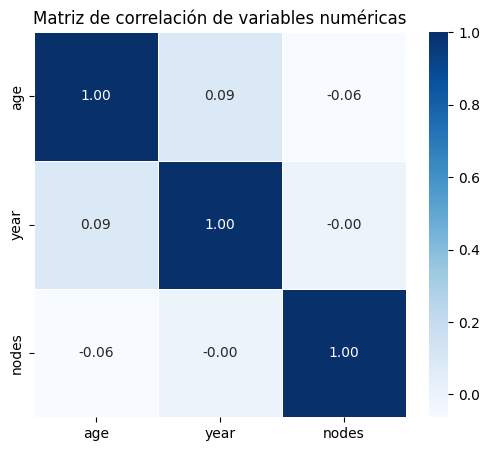

In [23]:
# Seleccionar columnas numéricas
columnas_numericas = data.select_dtypes(include=np.number).columns[:-1]  # Excluimos 'status'

# Calcular matriz de correlación
corr = data[columnas_numericas].corr()

# Crear heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="Blues", linewidths=0.5, fmt=".2f")
plt.title('Matriz de correlación de variables numéricas')
plt.show()

Pairplot para visualizar relaciones entre variables numéricas.

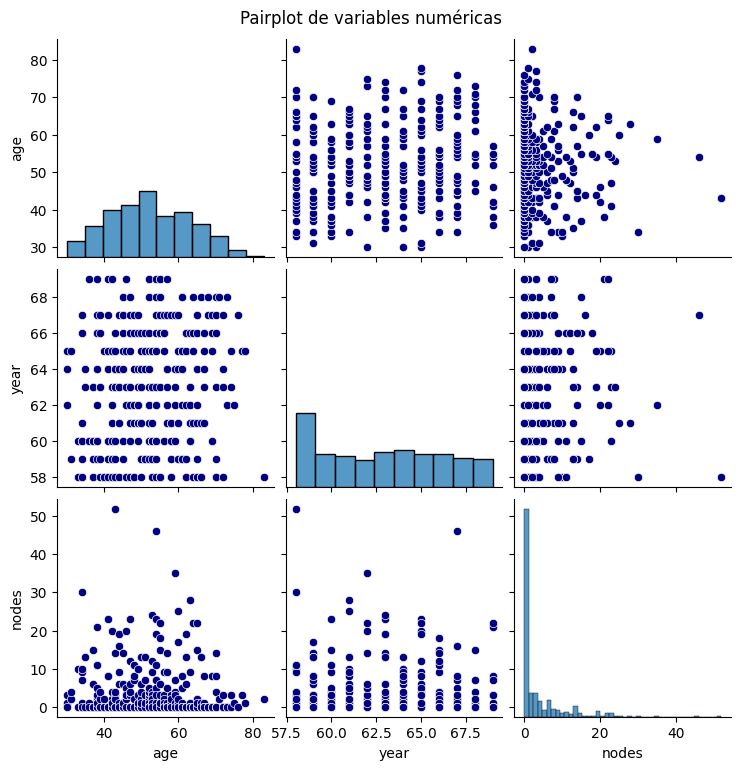

In [24]:
# Seleccionar columnas numéricas
columnas_numericas = data.select_dtypes(include=np.number).columns[:-1]  # Excluimos 'status'

# Configurar la paleta azul
paleta_azul = sns.color_palette("Blues", n_colors=len(columnas_numericas))

# Crear pairplot
sns.pairplot(data[columnas_numericas], diag_kind='hist', plot_kws={'color':'navy'})
plt.suptitle('Pairplot de variables numéricas', y=1.02)
plt.show()

Pruebas de normalidad (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov) y QQplot para las columnas numéricas.


=== Columna: age ===
Shapiro-Wilk: estadístico=0.9895, p-valor=0.0260
Anderson-Darling: estadístico=0.7316
  Nivel 15.0%: crítico=0.569
  Nivel 10.0%: crítico=0.648
  Nivel 5.0%: crítico=0.777
  Nivel 2.5%: crítico=0.906
  Nivel 1.0%: crítico=1.078
Kolmogorov-Smirnov: estadístico=0.0479, p-valor=0.4698


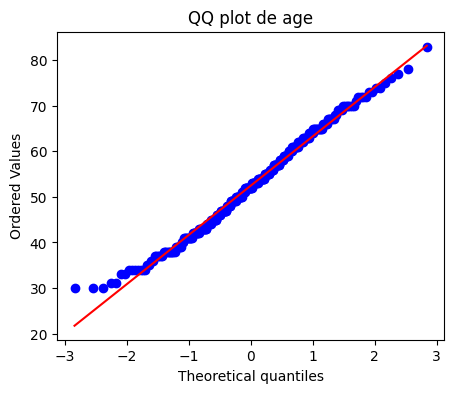


=== Columna: year ===
Shapiro-Wilk: estadístico=0.9468, p-valor=0.0000
Anderson-Darling: estadístico=4.3137
  Nivel 15.0%: crítico=0.569
  Nivel 10.0%: crítico=0.648
  Nivel 5.0%: crítico=0.777
  Nivel 2.5%: crítico=0.906
  Nivel 1.0%: crítico=1.078
Kolmogorov-Smirnov: estadístico=0.1074, p-valor=0.0016


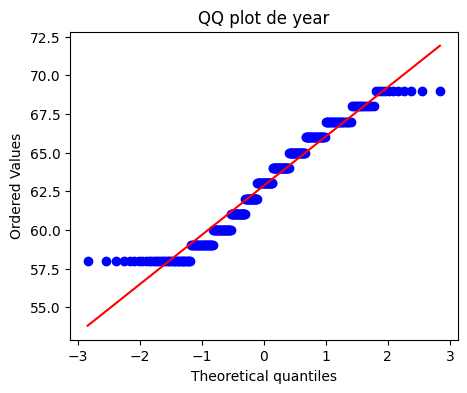


=== Columna: nodes ===
Shapiro-Wilk: estadístico=0.6153, p-valor=0.0000
Anderson-Darling: estadístico=39.6866
  Nivel 15.0%: crítico=0.569
  Nivel 10.0%: crítico=0.648
  Nivel 5.0%: crítico=0.777
  Nivel 2.5%: crítico=0.906
  Nivel 1.0%: crítico=1.078
Kolmogorov-Smirnov: estadístico=0.2877, p-valor=0.0000


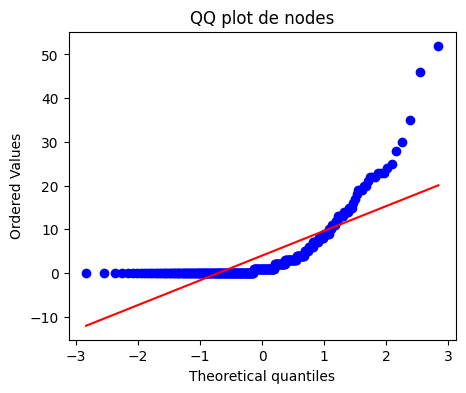

In [25]:
# Seleccionar columnas numéricas
columnas_numericas = data.select_dtypes(include='number').columns[:-1]  # Excluimos 'status'

# Configuración de la paleta azul para los QQ plots
paleta_azul = sns.color_palette("Blues", n_colors=len(columnas_numericas))

# Crear QQ plots y realizar pruebas de normalidad
for i, col in enumerate(columnas_numericas):
    print(f"\n=== Columna: {col} ===")

    # Shapiro-Wilk
    stat_shapiro, p_shapiro = stats.shapiro(data[col])
    print(f"Shapiro-Wilk: estadístico={stat_shapiro:.4f}, p-valor={p_shapiro:.4f}")

    # Anderson-Darling
    result_ad = stats.anderson(data[col], dist='norm')
    print(f"Anderson-Darling: estadístico={result_ad.statistic:.4f}")
    for j, sl in enumerate(result_ad.significance_level):
        print(f"  Nivel {sl}%: crítico={result_ad.critical_values[j]}")

    # Kolmogorov-Smirnov (comparando con normal estandarizada)
    standardized_data = (data[col] - data[col].mean()) / data[col].std()
    stat_ks, p_ks = stats.kstest(standardized_data, 'norm')
    print(f"Kolmogorov-Smirnov: estadístico={stat_ks:.4f}, p-valor={p_ks:.4f}")

    # QQ plot
    plt.figure(figsize=(5,4))
    stats.probplot(data[col], dist="norm", plot=plt)
    plt.title(f"QQ plot de {col}")
    plt.show()

# **3. Identificar y tratar los datos faltantes utilizando técnicas como imputación por media, mediana o moda.**

Porcentaje de Valores Faltantes por Variable.

Porcentaje de valores faltantes por columna:
age       0.0
year      0.0
nodes     0.0
status    0.0
dtype: float64


/tmp/ipython-input-3801543181.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=porcentaje_faltantes.index, y=porcentaje_faltantes.values, palette=sns.color_palette("Blues", len(porcentaje_faltantes)))


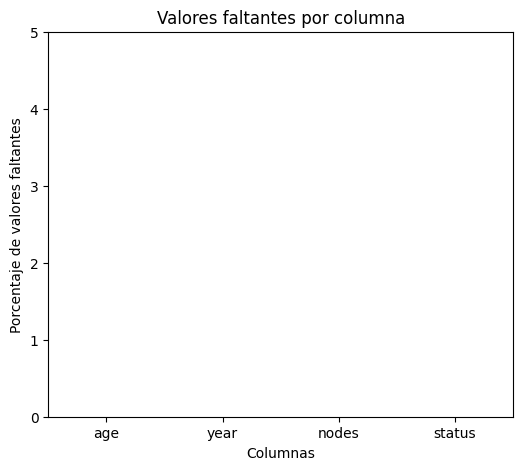

In [26]:
# Calcular porcentaje de valores faltantes por columna
faltantes = data.isnull().sum()
porcentaje_faltantes = (faltantes / len(data)) * 100
print("Porcentaje de valores faltantes por columna:")
print(porcentaje_faltantes)

# Gráfico de barras de valores faltantes
plt.figure(figsize=(6,5))
sns.barplot(x=porcentaje_faltantes.index, y=porcentaje_faltantes.values, palette=sns.color_palette("Blues", len(porcentaje_faltantes)))
plt.ylabel('Porcentaje de valores faltantes')
plt.xlabel('Columnas')
plt.title('Valores faltantes por columna')
plt.ylim(0, max(porcentaje_faltantes.values) + 5)  # margen superior
plt.show()